In [1]:
#Loading Packages and Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
train_data=pd.read_csv("train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test_data=pd.read_csv("test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_data.shape

(8523, 12)

In [5]:
test_data.shape

(5681, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

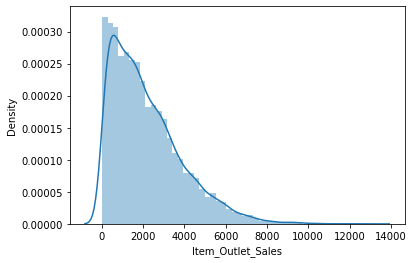

In [8]:
#Univarate Analysis
sns.distplot(train_data.Item_Outlet_Sales)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

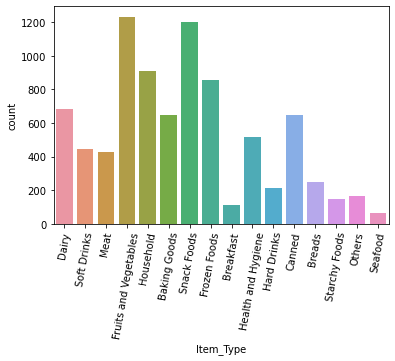

In [9]:
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=80)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

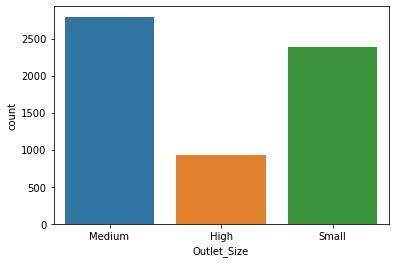

In [10]:
sns.countplot(train_data.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

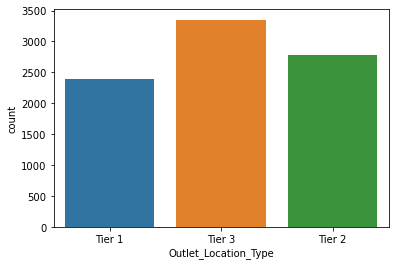

In [11]:
sns.countplot(train_data.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

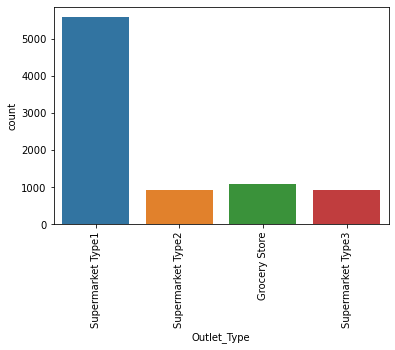

In [12]:
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation=90)

<AxesSubplot:ylabel='Item_Outlet_Sales'>

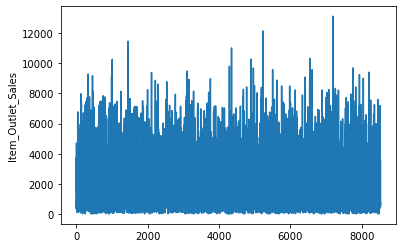

In [13]:
sns.lineplot(data = train_data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

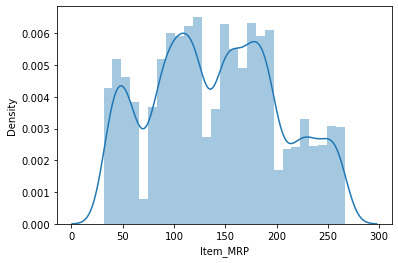

In [14]:
sns.distplot(train_data.Item_MRP)

In [15]:
#Bivariate Analysis

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales Analysis')

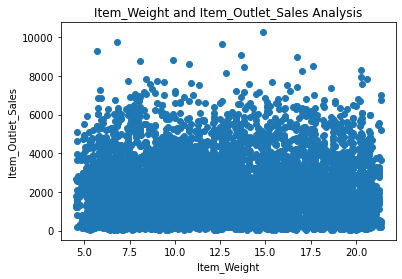

In [16]:
plt.scatter(train_data.Item_Weight,train_data.Item_Outlet_Sales)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")

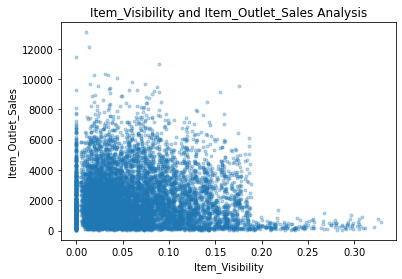

In [17]:
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Visibility, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)

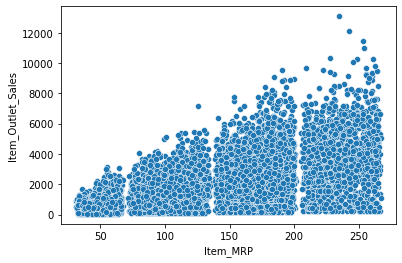

In [18]:
sns.scatterplot(x = train_data['Item_MRP'], y = train_data['Item_Outlet_Sales'])
plt.show()

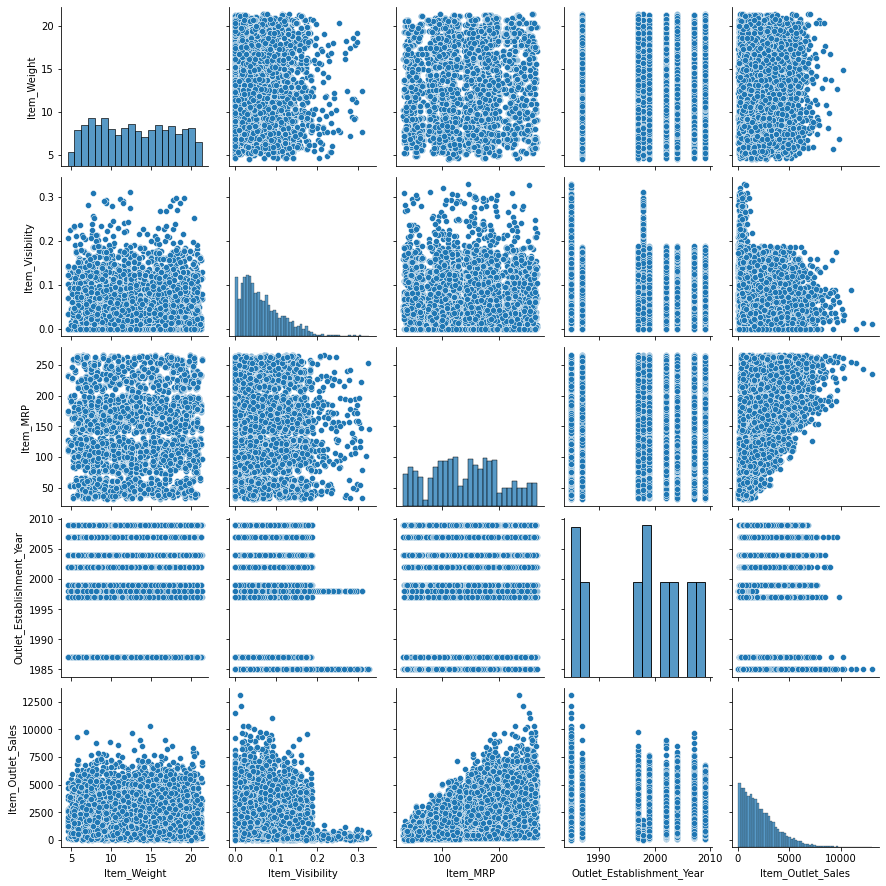

In [19]:
sns.pairplot(data=train_data)

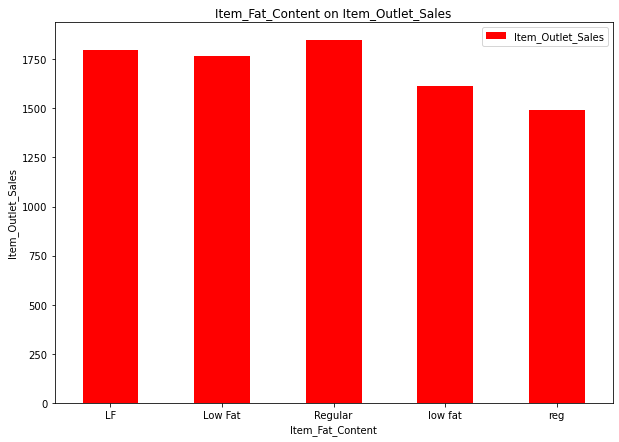

In [20]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='red',figsize=(10,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [21]:
#Missing value
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [23]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df=pd.concat([train_data,test_data], ignore_index=True)

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [26]:
train_data.shape

(8523, 13)

In [27]:
test_data.shape

(5681, 12)

In [28]:
df.shape

(14204, 13)

In [29]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [30]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [31]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [32]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [33]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [34]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [35]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [36]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [37]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       5998
Regular       4824
Non-Edible    2686
LF             367
reg            195
low fat        134
Name: Item_Fat_Content, dtype: int64

In [38]:
item_visib = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [39]:
item_visib

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [40]:
function = lambda x: x['Item_Visibility']/item_visib['Item_Visibility'][item_visib.index == x['Item_Identifier']][0]
df['item_visib'] = df.apply(function,axis=1).astype(float)

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Outlet_Years               14204 non-null  int

In [43]:
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['New_Item_type'] = encoder.fit_transform(df['New_Item_type'])

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib,Outlet
0,156,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,8,5.92,3,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,662,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,1121,19.20,3,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,1297,8.93,2,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [45]:
#one hot encoding
df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int32  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Outlet_Years               14204 non-null  int64  
 10  item_visib                 14204 non-null  float64
 11  Item_Fat_Content_0         14204 non-null  uint8  
 12  Item_Fat_Content_1         14204 non-null  uint8  
 13  Item_Fat_Content_2         14204 non-null  uin

In [47]:
#Modelbuilding

In [48]:
train = df.loc[df['source'] == 'train']
test= df.loc[df['source'] == 'test']

In [49]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)


In [50]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']

In [51]:
x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=2)

In [53]:
X_train.shape

(6818, 36)

In [54]:
X_test.shape

(1705, 36)

In [55]:
x_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,item_visib,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,20.750000,0.007565,13,107.8622,1999,10,1.029192,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8524,8.300000,0.038428,4,87.3198,2007,2,1.130311,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8525,14.600000,0.099575,11,241.7538,1998,11,1.735215,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8526,7.315000,0.015388,13,155.0340,2007,2,1.291577,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8527,12.695633,0.118599,4,234.2300,1985,24,0.917824,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
# standard scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_scaling= sc.fit_transform(X_train)  
X_test_scaling= sc.transform(X_test)

In [58]:
X_train_scaling

array([[-0.24151059, -0.1700305 ,  0.65773268, ..., -0.34786898,
         2.84654242, -0.34866323],
       [ 0.00834025, -1.28549807, -1.71560492, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-1.2041606 , -0.3572697 , -1.00360364, ..., -0.34786898,
         2.84654242, -0.34866323],
       ...,
       [ 1.38849802,  0.5035508 ,  0.65773268, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-0.93131133,  0.4037263 , -0.0542686 , ...,  2.87464554,
        -0.35130339, -0.34866323],
       [-1.46283587,  0.74344933, -1.71560492, ..., -0.34786898,
        -0.35130339, -0.34866323]])

In [59]:
X_test_scaling

array([[ 0.00834025,  0.65218954, -0.29160236, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-0.15882899,  1.26795963, -0.52893612, ...,  2.87464554,
        -0.35130339, -0.34866323],
       [-1.65890937,  1.26359938, -0.76626988, ...,  2.87464554,
        -0.35130339, -0.34866323],
       ...,
       [ 1.48299127,  2.17761528,  0.42039892, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [ 1.38849802, -1.28549807,  1.36973396, ..., -0.34786898,
        -0.35130339, -0.34866323],
       [-1.4274009 ,  0.38478172, -0.29160236, ...,  2.87464554,
        -0.35130339, -0.34866323]])

In [60]:
Y_train

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
          ...    
1099    1957.4520
2514    2013.3792
6637    2006.7212
2575    1372.2138
7336    1830.9500
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [61]:
Y_test

1112    1544.6560
1751    6404.9960
7648    1070.6064
7362     369.5190
5332     101.2016
          ...    
3503    4255.7936
975     1222.4088
6190    1551.9798
32      3068.0064
4433    5480.8656
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [62]:
#linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
lr_prediction=lr.predict(X_test)
lr_prediction

array([2688., 3872., 1408., ..., 2784., 3808., 3616.])

In [64]:
lr_accuracy=lr.score(X_train,Y_train)

In [65]:
lr_accuracy

0.567274734544846

In [66]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,lr_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,lr_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,lr_prediction)))


Mean Absolute Error: 874.4530606451614
Mean Squared Error: 1397113.0470306184
Root Mean Squared Error: 1181.9953667551401


In [67]:
#regularized Linear regression
#Lasso

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.01)

In [70]:
lasso=lasso.score(X_train,Y_train)

In [71]:
lasso

0.5678126797089379

In [72]:
#Ridge

In [73]:
from sklearn.linear_model import Ridge

In [74]:
ridge=Ridge(alpha=0.5)

In [75]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5)

In [76]:
ridge_prediction=ridge.predict(X_test)

In [77]:
ridge_prediction

array([2644.95032287, 3838.37419265, 1373.02385944, ..., 2793.57833678,
       3804.9522408 , 3584.98291552])

In [78]:
ridge_y=ridge.score(x_train,y_train)

In [79]:
ridge_y

0.5633989752796715

In [80]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,ridge_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,ridge_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,ridge_prediction)))


Mean Absolute Error: 872.8234796581942
Mean Squared Error: 1400060.9131206868
Root Mean Squared Error: 1183.2416968314997


In [81]:
# randomforest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

In [83]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=100, n_estimators=400,
                      n_jobs=4)

In [84]:
rf_accuracy = rf.score(X_train,Y_train)

In [85]:
rf_accuracy

0.610664590812938

In [86]:
rf_prediction=rf.predict(X_test)
rf_prediction

array([1445.70791709, 3897.20381041, 1386.04097576, ..., 2803.67778576,
       3868.9125934 , 3910.60169029])

In [87]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,rf_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,rf_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,rf_prediction)))


Mean Absolute Error: 794.0205639717158
Mean Squared Error: 1288160.878769655
Root Mean Squared Error: 1134.971752410453


In [88]:
#Xgboost

In [89]:
from xgboost import XGBRegressor
xg= XGBRegressor(n_estimators = 100, learning_rate=0.05)

In [90]:
xg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [91]:
xg_prediction = xg.predict(X_test)
xg_prediction

array([2228.4822, 3909.6084, 1457.1346, ..., 2893.4504, 3264.712 ,
       3659.1287], dtype=float32)

In [92]:
xg.score(X_train, Y_train)

0.6930848837091375

In [93]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,xg_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,xg_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,xg_prediction)))


Mean Absolute Error: 794.8953886901461
Mean Squared Error: 1310207.2426430339
Root Mean Squared Error: 1144.6428450145634
